In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#import data
dt = pd.read_csv('/Users/annabella/Downloads/online_shoppers_intention.csv')
dt.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### EDA

In [4]:
dt.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


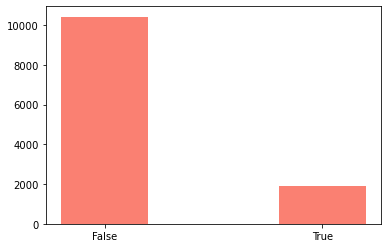

In [18]:
plt.bar(dt['Revenue'].value_counts().index, dt['Revenue'].value_counts().values, width = 0.4, tick_label = ['False','True'], color = 'salmon')
plt.show()

<AxesSubplot:>

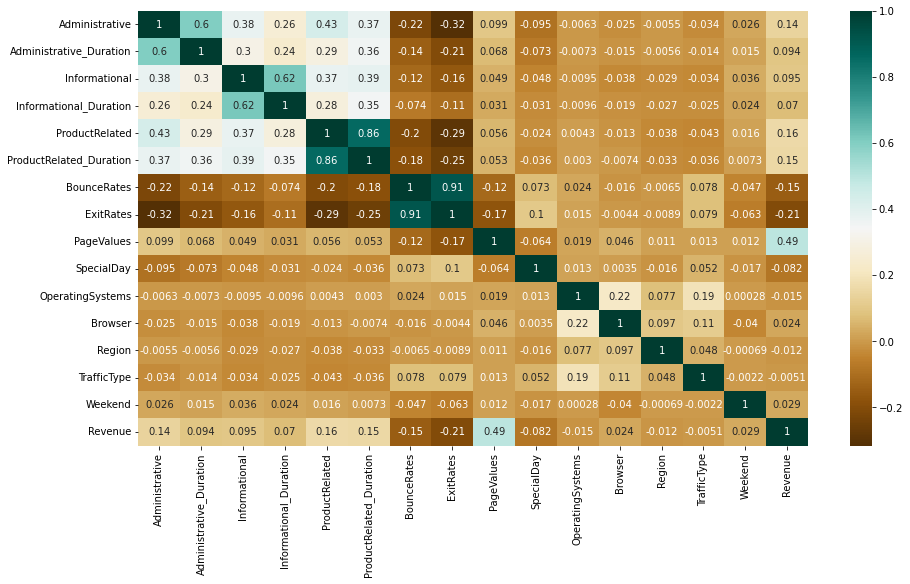

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(dt.corr(), annot=True, cmap='BrBG')

#### Feature engineering

In [48]:
#month column
mon = dt['Month'].value_counts()
print(mon)

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


In [3]:
dt['Month'] = dt['Month'].replace('June', 'Jun')

In [4]:
import calendar
month = []
for M in dt['Month'].values:
    m = list(calendar.month_abbr).index(M)
    month.append(m)
dt['Month'] = month

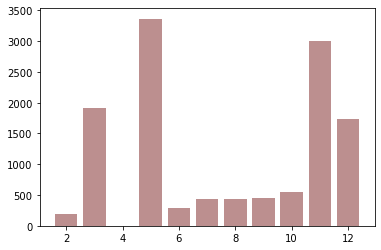

In [58]:
mon = dt['Month'].value_counts()
mon = mon.sort_index()
plt.bar(mon.index, mon.values, color = 'rosybrown')
plt.show()

In [59]:
dt['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [5]:
#tranform visitortype to numeric
dt['VisitorType'] = dt['VisitorType'].apply(lambda x: 0 if x == 'Returning_Visitor' else (1 if x == 'New_Visitor' else 3))

In [6]:
#split data into training and test
from sklearn.model_selection import train_test_split
X = dt.iloc[:,:-1]
y = dt.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)

(8631, 17) (3699, 17)


#### Random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3001  123]
 [ 255  320]]
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.72      0.56      0.63       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



In [26]:
y_pred_t = rf.predict(X_train)
print(classification_report(y_train, y_pred_t))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7298
        True       1.00      1.00      1.00      1333

    accuracy                           1.00      8631
   macro avg       1.00      1.00      1.00      8631
weighted avg       1.00      1.00      1.00      8631



In [27]:
#feature importance table
feature_im = list(rf.feature_importances_)
feature_name = list(X_train.columns)
features = pd.DataFrame({'feature':feature_name, 'importance':feature_im})
features = features.sort_values(by=['importance'],ascending=False)
features

,feature,importance
8,PageValues,0.381137
5,ProductRelated_Duration,0.090867
7,ExitRates,0.084586
4,ProductRelated,0.073500
6,BounceRates,0.059638
1,Administrative_Duration,0.057645
10,Month,0.043595
0,Administrative,0.042529
14,TrafficType,0.030519
13,Region,0.030185


#### XGBoost + RandomizedSearchCV

In [10]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators':[n for n in range(100, 1001, 50)],'learning_rate':[i for i in np.arange(0.1,1.7,0.1)],'max_depth':[1,2], 'gamma':[g for g in np.arange(0,5.1,0.25)]}
rsc = RandomizedSearchCV(xgb, parameters,scoring='roc_auc',cv=5)
rsc.fit(X_train, y_train)
print(rsc.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.75, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [11]:
#use the selected parameters to fit the model
XGB = XGBClassifier(n_estimators=400,learning_rate=0.1,max_depth=2,gamma=3.75)
XGB.fit(X_train, y_train)
y_pred_xgb = XGB.predict(X_test)
y_pred_p_xgb = XGB.predict_proba(X_test)[:,1]
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[2976  148]
 [ 236  339]]
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      3124
        True       0.70      0.59      0.64       575

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



In [12]:
#results on train set
y_pred_xgb_t = XGB.predict(X_train)
print(classification_report(y_train, y_pred_xgb_t))

              precision    recall  f1-score   support

       False       0.93      0.96      0.95      7298
        True       0.76      0.62      0.69      1333

    accuracy                           0.91      8631
   macro avg       0.85      0.79      0.82      8631
weighted avg       0.91      0.91      0.91      8631



In [13]:
#feature importance table
feature_im_xgb = list(XGB.feature_importances_)
features_xgb = pd.DataFrame({'feature':feature_name, 'importance':feature_im_xgb})
features_xgb = features_xgb.sort_values(by=['importance'],ascending=False)
features_xgb

,feature,importance
8,PageValues,0.479260
6,BounceRates,0.134538
10,Month,0.065170
7,ExitRates,0.048668
15,VisitorType,0.048297
1,Administrative_Duration,0.047051
4,ProductRelated,0.044618
0,Administrative,0.039484
5,ProductRelated_Duration,0.039403
14,TrafficType,0.019558


#### SVB + RandomizedSearch

In [7]:
#scale the dataset
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
means = scaler.mean_
std = scaler.var_**0.5

def scale_test_data(test_data, means = means, std = std):
    return (test_data - means) / std
X_test_s = scale_test_data(X_test)
X_test_s = X_test.to_numpy()

In [10]:
#Linear SVB
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
parameters = {'C':[i for i in np.arange(0.01,10.01,0.2)]}
rSC = RandomizedSearchCV(svm, parameters,verbose = 0,cv=5)
rSC.fit(X_train_s, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='linear'),
                   param_distributions={'C': [0.01, 0.21000000000000002,
                                              0.41000000000000003,
                                              0.6100000000000001, 0.81, 1.01,
                                              1.2100000000000002,
                                              1.4100000000000001, 1.61, 1.81,
                                              2.01, 2.21, 2.41, 2.61, 2.81,
                                              3.01, 3.21, 3.41, 3.61, 3.81,
                                              4.01, 4.21, 4.41, 4.61,
                                              4.8100000000000005, 5.01, 5.21,
                                              5.41, 5.61, 5.8100000000000005, ...]})

In [37]:
print(rSC.best_estimator_)

SVC(C=0.6100000000000001, kernel='linear')


In [40]:
svm = SVC(C=0.61, kernel='linear')
svm.fit(X_train_s, y_train)
y_pred = svm.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1529 1595]
 [  47  528]]
              precision    recall  f1-score   support

       False       0.97      0.49      0.65      3124
        True       0.25      0.92      0.39       575

    accuracy                           0.56      3699
   macro avg       0.61      0.70      0.52      3699
weighted avg       0.86      0.56      0.61      3699



In [49]:
#Polynomial SVB
svm = SVC(kernel = 'poly')
parameters = {'C':[i for i in np.arange(0.01,10.01,0.2)], 'degree':[2,3,4,5,6]}
rSC = RandomizedSearchCV(svm, parameters,verbose = 0,cv=5)
rSC.fit(X_train_s, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(kernel='poly'),
                   param_distributions={'C': [0.01, 0.21000000000000002,
                                              0.41000000000000003,
                                              0.6100000000000001, 0.81, 1.01,
                                              1.2100000000000002,
                                              1.4100000000000001, 1.61, 1.81,
                                              2.01, 2.21, 2.41, 2.61, 2.81,
                                              3.01, 3.21, 3.41, 3.61, 3.81,
                                              4.01, 4.21, 4.41, 4.61,
                                              4.8100000000000005, 5.01, 5.21,
                                              5.41, 5.61, 5.8100000000000005, ...],
                                        'degree': [2, 3, 4, 5, 6]})

In [50]:
print(rSC.best_params_)

{'degree': 4, 'C': 8.81}


In [52]:
svm = SVC(C=8.81, kernel='poly', degree=4)
svm.fit(X_train_s, y_train)
y_pred = svm.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2892  232]
 [ 537   38]]
              precision    recall  f1-score   support

       False       0.84      0.93      0.88      3124
        True       0.14      0.07      0.09       575

    accuracy                           0.79      3699
   macro avg       0.49      0.50      0.49      3699
weighted avg       0.73      0.79      0.76      3699



In [45]:
svm = SVC(kernel = 'rbf')
parameters = {'C':[i for i in np.arange(0.01,10.01,0.2)], 'gamma':[0.01,0.1,1,10,100]}
rSC = RandomizedSearchCV(svm, parameters,verbose = 0,cv=5)
rSC.fit(X_train_s, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.01, 0.21000000000000002,
                                              0.41000000000000003,
                                              0.6100000000000001, 0.81, 1.01,
                                              1.2100000000000002,
                                              1.4100000000000001, 1.61, 1.81,
                                              2.01, 2.21, 2.41, 2.61, 2.81,
                                              3.01, 3.21, 3.41, 3.61, 3.81,
                                              4.01, 4.21, 4.41, 4.61,
                                              4.8100000000000005, 5.01, 5.21,
                                              5.41, 5.61, 5.8100000000000005, ...],
                                        'gamma': [0.01, 0.1, 1, 10, 100]})

In [47]:
print(rSC.best_params_)

{'gamma': 0.01, 'C': 4.8100000000000005}


In [11]:
#RBF SVB
svm = SVC(C=4.81, kernel='rbf', gamma=0.01)
svm.fit(X_train_s, y_train)
y_pred = svm.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3124    0]
 [ 575    0]]
              precision    recall  f1-score   support

       False       0.84      1.00      0.92      3124
        True       0.00      0.00      0.00       575

    accuracy                           0.84      3699
   macro avg       0.42      0.50      0.46      3699
weighted avg       0.71      0.84      0.77      3699



/Users/annabella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annabella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annabella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
y_pred_svm_t = svm.predict(X_train_s)
print(classification_report(y_train, y_pred_svm_t))

              precision    recall  f1-score   support

       False       0.93      0.99      0.96      7298
        True       0.95      0.57      0.71      1333

    accuracy                           0.93      8631
   macro avg       0.94      0.78      0.84      8631
weighted avg       0.93      0.93      0.92      8631



In [20]:
#feature importance table
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm, X_test_s, y_test)
feature_im_svm = list(perm_importance.importances_mean)
features_svm = pd.DataFrame({'feature':feature_name, 'importance':feature_im_svm})
features_svm = features_svm.sort_values(by=['importance'],ascending=False)
features_svm

,feature,importance
8,PageValues,0.003352
4,ProductRelated,0.000649
5,ProductRelated_Duration,0.000324
3,Informational_Duration,0.000216
1,Administrative_Duration,0.000054
11,OperatingSystems,0.000000
15,VisitorType,0.000000
14,TrafficType,0.000000
13,Region,0.000000
12,Browser,0.000000


#### Deep learning

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
#Build the model and layers
model = Sequential()
model.add(Dense(17, activation='relu',input_shape=(17,)))
model.add(Dense(5, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
#fit the model
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
864/864 [==============================] - 2s 975us/step - loss: 3.1111 - accuracy: 0.8030
Epoch 2/20
864/864 [==============================] - 1s 890us/step - loss: 0.4056 - accuracy: 0.8458
Epoch 3/20
864/864 [==============================] - 1s 886us/step - loss: 0.3945 - accuracy: 0.8469
Epoch 4/20
864/864 [==============================] - 1s 887us/step - loss: 0.3884 - accuracy: 0.8490
Epoch 5/20
864/864 [==============================] - 1s 905us/step - loss: 0.3754 - accuracy: 0.8569
Epoch 6/20
864/864 [==============================] - 1s 889us/step - loss: 0.3681 - accuracy: 0.8650
Epoch 7/20
864/864 [==============================] - 1s 891us/step - loss: 0.3673 - accuracy: 0.8655
Epoch 8/20
864/864 [==============================] - 1s 958us/step - loss: 0.3602 - accuracy: 0.8673
Epoch 9/20
864/864 [==============================] - 1s 973us/step - loss: 0.3606 - accuracy: 0.8658
Epoch 10/20
864/864 [==============================] - 1s 899us/step - loss: 0.360

In [15]:
#results on training and test sets
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print(f'Accuracy on training data: {scores[1]}')   

pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy on test data: {scores2[1]}')    

270/270 [==============================] - 0s 1ms/step
Accuracy on training data: 0.8846020102500916
116/116 [==============================] - 0s 868us/step
Accuracy on test data: 0.8807786107063293
